In [1]:
#패키지 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import rmse
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [19]:
#평가 함수 RMSE, MAPE는 sklearn에서 제공되지 않ㅇ는 함수이므로, 직접 정의한다.

def root_mean_squared_error (y_true, y_pred):
    return np.sqrt (mean_squared_error(y_true, y_pred))

def mean_absolute_percentage_error (y_true, y_pred):
    return np.mean (np.abs((y_true - y_pred)/y_true))*100

In [10]:
#데이터 불러오기

df_raw = pd.read_csv ('체질검사.csv', engine='python', encoding='euc-KR')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [11]:
df_raw.info()

#결측치 없음, 14개의 변수, 전부 실수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   FAT      252 non-null    float64
 1   AGE      252 non-null    int64  
 2   WEIGHT   252 non-null    float64
 3   HEIGHT   252 non-null    float64
 4   NECK     252 non-null    float64
 5   CHEST    252 non-null    float64
 6   ABDOMEN  252 non-null    float64
 7   HIP      252 non-null    float64
 8   THIGH    252 non-null    float64
 9   KNEE     252 non-null    float64
 10  ANKLE    252 non-null    float64
 11  BICEPS   252 non-null    float64
 12  FOREARM  252 non-null    float64
 13  WRIST    252 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 27.7 KB


In [12]:
#목표변수와 설명변수 지정

df_raw_y = df_raw['FAT'] #목표변수
df_raw_x = df_raw.drop('FAT', axis=1, inplace=False) #설명변수

#데이터 구성하기

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (176, 13)
train data Y size : (176,)
test data X size : (76, 13)
test data Y size : (76,)


In [13]:
#회귀모델

lr_model = smf.ols(formula='FAT ~ NECK+ABDOMEN+HIP+FOREARM+WRIST',data=df_raw)
lr_result=lr_model.fit()
print(lr_result.summary())

#Decision Tree
dt_model = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=20, max_depth=4)
dt_model.fit(df_train_x,df_train_y)

#Random Forest
rf_model = RandomForestRegressor(random_state=1234, n_estimators = 100, min_samples_leaf=6, min_samples_split=14, max_depth=4)
rf_model.fit(df_train_x,df_train_y)

#Graduent Boosting
gb_model = GradientBoostingRegressor(random_state=1234, n_estimators=30, min_samples_leaf=11, min_samples_split=22, max_depth=4
                                    , learning_rate=0.1)
gb_model.fit(df_train_x,df_train_y)

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Wed, 19 May 2021   Prob (F-statistic):           4.38e-68
Time:                        11:05:42   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7037      6.231      0.434      0.6

GradientBoostingRegressor(max_depth=4, min_samples_leaf=11,
                          min_samples_split=22, n_estimators=30,
                          random_state=1234)

In [20]:
#모델 리스트, 그래프를 그리기 생성 목적

models=['회귀분석', '의사결정나무', '랜덤포레스트', '그래디언트부스팅']
#평가 리스트 초기화
mse=[]
rmse=[]
mae=[]
mape=[]

#회귀분석 예측
lr_y_pred = lr_result.predict(df_test_x)

#회귀분석 평가
mse.append(mean_squared_error(df_test_y,lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y,lr_y_pred))
mae.append(mean_absolute_error(df_test_y,lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,lr_y_pred))


In [21]:
#의사결정나무 예측
dt_y_pred = dt_model.predict(df_test_x)

#의사결정나무 평가
mse.append(mean_squared_error(df_test_y,dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y,dt_y_pred))
mae.append(mean_absolute_error(df_test_y,dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,dt_y_pred))

In [23]:
#랜덤 포레스트 예측
rf_y_pred = rf_model.predict(df_test_x)

#랜덤 포레스트 평가
mse.append(mean_squared_error(df_test_y,rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y,rf_y_pred))
mae.append(mean_absolute_error(df_test_y,rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,rf_y_pred))

In [24]:
#그래디언트 부스팅 예측
gb_y_pred = gb_model.predict(df_test_x)

#그래디언트 부스팅 평가
mse.append(mean_squared_error(df_test_y,gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y,gb_y_pred))
mae.append(mean_absolute_error(df_test_y,gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,gb_y_pred))

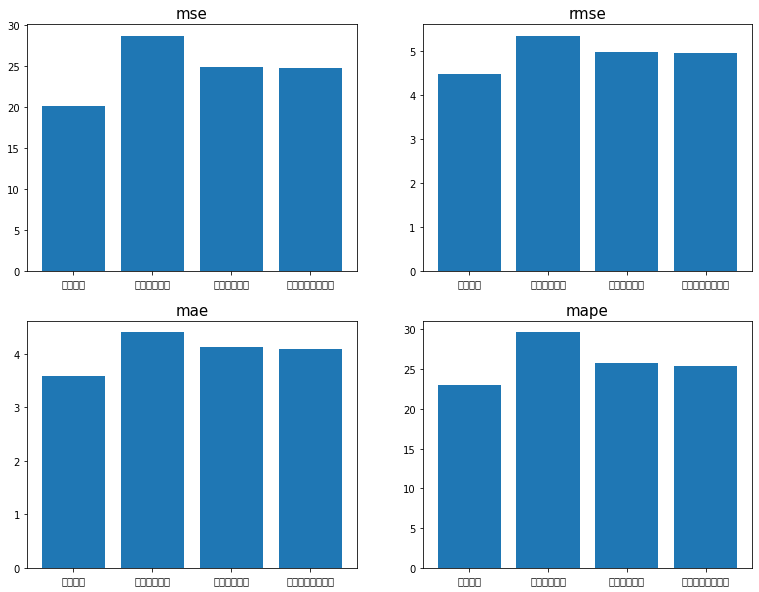

In [26]:
#시각화 평가

fig,ax=plt.subplots(2,2, figsize=(13,10))
ax[0,0].bar(models, mse)
ax[0,0].set_title('mse').set_fontsize(15)

ax[0,1].bar(models, rmse)
ax[0,1].set_title('rmse').set_fontsize(15)

ax[1,0].bar(models, mae)
ax[1,0].set_title('mae').set_fontsize(15)

ax[1,1].bar(models, mape)
ax[1,1].set_title('mape').set_fontsize(15)

## 후진 제거로 선택된 설명변수를 이용한 선형회귀모델의 정확도가 가장 높고
## 반면에 의사결정나무 모델의 성능이 가장 미흡하며, 평가 지표별 모델의 정확도 추세는 유사하게 나타남

In [29]:
from datetime import datetime
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [31]:
#데이터 불러오기

df_raw = pd.read_csv ('환율.csv', engine='python', encoding='euc-KR', parse_dates = ['APPL_DATE'])
df_raw.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


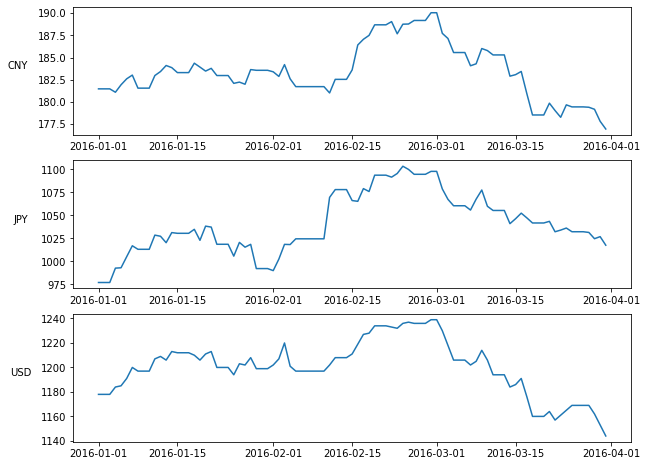

In [32]:
fig, (ax1,ax2,ax3)=plt.subplots(nrows=3, ncols=1, figsize=(10,8))
for (ax,idx, currency) in zip ([ax1,ax2,ax3],[311,312,313],['CNY','JPY','USD']):
    ax.plot('APPL_DATE','STD_RATE', data=df_raw[df_raw['CURRENCY']==currency])
    ax.set_ylabel(currency, rotation=0, labelpad=20)

In [33]:
df_CNY = df_raw[df_raw['CURRENCY']=='CNY'].set_index('APPL_DATE')
df_CNY.drop(['CURRENCY', 'USD_CONV_DATE'],axis=1, inplace=True)
df_JPY = df_raw[df_raw['CURRENCY']=='JPY'].set_index('APPL_DATE')
df_JPY.drop(['CURRENCY', 'USD_CONV_DATE'],axis=1, inplace=True)
df_USD = df_raw[df_raw['CURRENCY']=='USD'].set_index('APPL_DATE')
df_USD.drop(['CURRENCY', 'USD_CONV_DATE'],axis=1, inplace=True)
df_CNY.head()

,STD_RATE
APPL_DATE,
2016-01-01,181.48
2016-01-02,181.48
2016-01-03,181.48
2016-01-04,181.10
2016-01-05,181.94


In [34]:
train_size = 0.9
len_idx = len(df_CNY.index)
mask=(np.arange(len_idx)/len_idx) < train_size
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False])

In [36]:
df_CNY_train = df_CNY[mask]
df_CNY_test = df_CNY[~mask]
print('shape of train data:{}'.format(df_CNY_train.shape))
print('shape of test data:{}'.format(df_CNY_test.shape))


shape of train data:(82, 1)
shape of test data:(9, 1)


In [41]:
df_CNY_train =df_CNY[df_CNY.index <= '2016-03-22']
df_CNY_test = df_CNY[df_CNY.index > '2016-03-22']
df_CNY_test.head()

,STD_RATE
APPL_DATE,
2016-03-23,178.28
2016-03-24,179.68
2016-03-25,179.45
2016-03-26,179.45
2016-03-27,179.45


<AxesSubplot:xlabel='APPL_DATE'>

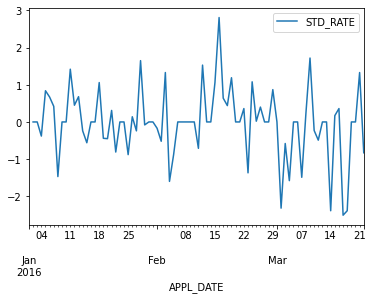

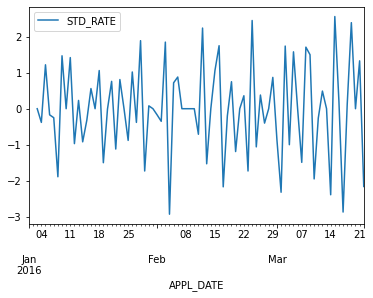

In [42]:
df_CNY_diff1 = df_CNY_train - df_CNY_train.shift(1)
df_CNY_diff1.plot()

df_CNY_diff2 = df_CNY_train-2*(df_CNY_train.shift(1))+(df_CNY_train.shift(2))
df_CNY_diff2.plot()

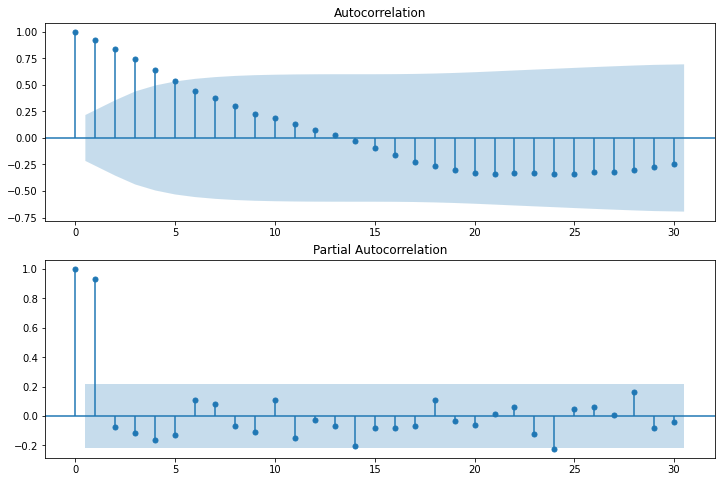

In [43]:
lag_size=30
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=plot_acf(df_CNY_train['STD_RATE'], lags=lag_size, ax=ax1)
ax2=fig.add_subplot(212)
fig=plot_pacf(df_CNY_train['STD_RATE'],lags=lag_size, ax=ax2)

In [47]:
ts_model_cny = ARIMA(df_CNY_train, order=(1,2,0))
ts_result_cny = ts_model_cny.fit(trend='c',full_output=True)
print(ts_result_cny.summary())

                             ARIMA Model Results                              
Dep. Variable:            D2.STD_RATE   No. Observations:                   80
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -123.512
Method:                       css-mle   S.D. of innovations              1.132
Date:                Wed, 19 May 2021   AIC                            253.025
Time:                        17:06:49   BIC                            260.171
Sample:                    01-03-2016   HQIC                           255.890
                         - 03-22-2016                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0022      0.088     -0.024      0.981      -0.175       0.171
ar.L1.D2.STD_RATE    -0.4389      0.102     -4.322      0.000      -0.638      -0.240
                        

/home/piai/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/piai/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred fre

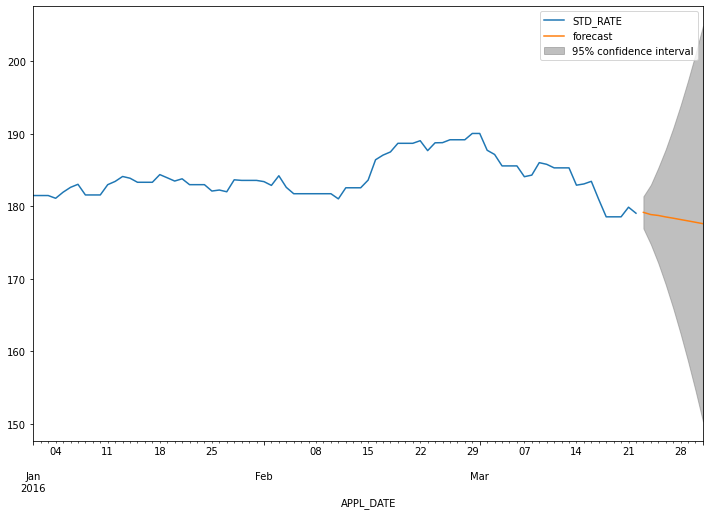

In [48]:
start_time=df_CNY_test.index.min()
end_time=df_CNY_test.index.max()
fig,ax = plt.subplots(figsize=(12,8))
ax = df_CNY_train.plot(ax=ax)
fig=ts_result_cny.plot_predict(start=start_time, end=end_time,ax=ax, plot_insample=False)

In [49]:
start_time = pd.to_datetime('2016-01-03')
y_pred = ts_result_cny.predict(start=start_time, end=end_time, typ='levels')
df_merge = df_CNY
df_merge['예측값'] = y_pred
df_merge.head()

,STD_RATE,예측값
APPL_DATE,,
2016-01-01,181.48,NaN
2016-01-02,181.48,NaN
2016-01-03,181.48,181.477844
2016-01-04,181.10,181.476898
2016-01-05,181.94,180.883667


<AxesSubplot:xlabel='APPL_DATE'>

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWar

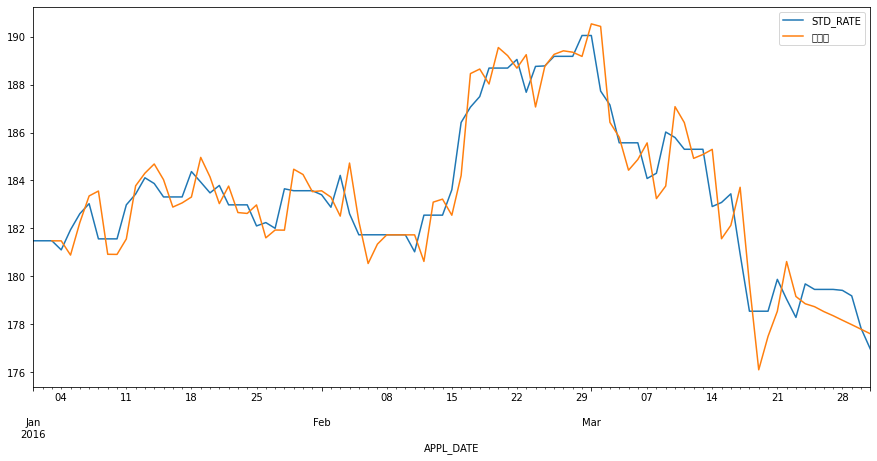

In [50]:
df_merge.plot(y=['STD_RATE','예측값'], figsize=(15,7))

# 분류 파트

In [53]:
from sklearn.preprocessing import StandardScaler
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
df_ram=pd.read_csv